# IEX CLOUD API

Connecting to Database 

In [1]:
import mysql.connector

# Connection details
config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Duke#7539',
    'database': 'stocks'
}

try:
    # Establish connection
    connection = mysql.connector.connect(**config)

    if connection.is_connected():
        print("Connection to MySQL database successful!")
        connection.close()
    else:
        print("Connection failed!")

except mysql.connector.Error as error:
    print("Error while connecting to MySQL", error)


Connection to MySQL database successful!


Using the IEX Cloud API to get an output 

In [2]:
import requests

# Replace 'YOUR_TOKEN_HERE' with your actual token
token = 'sk_973ce1ded0ff4efab9bd04fba84d7742'

# Example endpoint (replace with the specific endpoint you want to access)
endpoint = 'https://cloud.iexapis.com/stable/stock/AAPL/quote'

# Parameters (if any)
params = {
    'token': token
}

try:
    response = requests.get(endpoint, params=params)

    if response.status_code == 200:
        data = response.json()
        print("Data retrieved successfully:")
        print(data)
    else:
        print("Error:", response.status_code)
        print(response.text)

except requests.exceptions.RequestException as e:
    print("Request error:", e)


Data retrieved successfully:
{'avgTotalVolume': 52433648, 'calculationPrice': 'iexlasttrade', 'change': -1.67, 'changePercent': -0.00845, 'close': None, 'closeSource': 'official', 'closeTime': None, 'companyName': 'Apple Inc', 'currency': 'USD', 'delayedPrice': None, 'delayedPriceTime': None, 'extendedChange': None, 'extendedChangePercent': None, 'extendedPrice': None, 'extendedPriceTime': None, 'high': None, 'highSource': None, 'highTime': None, 'iexAskPrice': 0, 'iexAskSize': 0, 'iexBidPrice': 0, 'iexBidSize': 0, 'iexClose': 195.9, 'iexCloseTime': 1702933199527, 'iexLastUpdated': 1702933199527, 'iexMarketPercent': 0.02088717206700917, 'iexOpen': 196.11, 'iexOpenTime': 1702909800008, 'iexRealtimePrice': 195.9, 'iexRealtimeSize': 27, 'iexVolume': 1163947, 'lastTradeTime': 1702933199527, 'latestPrice': 195.9, 'latestSource': 'IEX Last Trade', 'latestTime': 'December 18, 2023', 'latestUpdate': 1702933199527, 'latestVolume': None, 'low': None, 'lowSource': None, 'lowTime': None, 'marketCa

In [4]:
import requests

# Replace 'YOUR_TOKEN_HERE' with your actual token
token = 'sk_973ce1ded0ff4efab9bd04fba84d7742'

symbols = ['AAPL', 'TSLA', 'MSFT', 'NVDA', 'GOOGL', 'AMZN', 'FB', 'NFLX', 'PYPL', 'JPM', 'GS', 'DIS', 'CRM', 'BABA']
endpoint = 'https://cloud.iexapis.com/stable/stock/{}/quote'

for symbol in symbols:
    try:
        response = requests.get(endpoint.format(symbol), params={'token': token})

        if response.status_code == 200:
            data = response.json()
            print(f"Symbol: {data['symbol']}")
            print(f"Currency: {data['currency']}")
            print(f"Latest Price: {data['latestPrice']}")
            print(f"Change: {data['change']}")
            print(f"Change Percent: {data['changePercent']}")
            print("------")
        else:
            print(f"Error fetching data for {symbol}: {response.status_code}")

    except requests.exceptions.RequestException as e:
        print("Request error:", e)


Symbol: AAPL
Currency: USD
Latest Price: 195.9
Change: -1.67
Change Percent: -0.00845
------
Symbol: TSLA
Currency: USD
Latest Price: 252.02
Change: -1.48
Change Percent: -0.00584
------
Symbol: MSFT
Currency: USD
Latest Price: 372.605
Change: 1.875
Change Percent: 0.00506
------
Symbol: NVDA
Currency: USD
Latest Price: 500.78
Change: 11.88
Change Percent: 0.0243
------
Symbol: GOOGL
Currency: USD
Latest Price: 135.81
Change: 3.21
Change Percent: 0.02421
------
Symbol: AMZN
Currency: USD
Latest Price: 154.09
Change: 4.45
Change Percent: 0.02974
------
Symbol: FB
Currency: USD
Latest Price: 196.64
Change: 0.99
Change Percent: 0.00506
------
Symbol: NFLX
Currency: USD
Latest Price: 486.215
Change: 14.155
Change Percent: 0.02999
------
Symbol: PYPL
Currency: USD
Latest Price: 61.45
Change: 0.19
Change Percent: 0.0031
------
Symbol: JPM
Currency: USD
Latest Price: 166.23
Change: 1
Change Percent: 0.00605
------
Symbol: GS
Currency: USD
Latest Price: 376.4
Change: -4.11
Change Percent: -0.0

## Inserting values into MySQL database

In [6]:
import requests
import mysql.connector

# API data retrieval function
def get_stock_data(symbol, token):
    endpoint = f'https://cloud.iexapis.com/stable/stock/{symbol}/quote'
    params = {'token': token}

    try:
        response = requests.get(endpoint, params=params)
        if response.status_code == 200:
            return response.json()
        else:
            print(f"Error fetching data for {symbol}: {response.status_code}")
            return None
    except requests.exceptions.RequestException as e:
        print("Request error:", e)
        return None

# MySQL connection details
config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Duke#7539',
    'database': 'stocks'
}

# Stocks to fetch data for
symbols = ['AAPL', 'TSLA', 'MSFT', 'NVDA', 'GOOGL', 'AMZN', 'FB', 'NFLX', 'PYPL', 'JPM', 'GS', 'DIS', 'CRM', 'BABA']

# Establish MySQL connection
try:
    connection = mysql.connector.connect(**config)

    if connection.is_connected():
        print("Connection to MySQL database successful!")

        cursor = connection.cursor()

        # Creating a table if it doesn't exist
        create_table_query = '''
        CREATE TABLE IF NOT EXISTS stock_data (
            id INT AUTO_INCREMENT PRIMARY KEY,
            symbol VARCHAR(10),
            currency VARCHAR(10),
            latest_price DECIMAL(10, 2),
            change_value DECIMAL(10, 2),
            change_percent DECIMAL(10, 2)
        )
        '''
        cursor.execute(create_table_query)
        connection.commit()

        # Fetching data from API and inserting into the table
        for symbol in symbols:
            stock_data = get_stock_data(symbol, 'sk_60acb782e5ab422eb86e9380ce4f5c0d')  # New IEX Cloud token

            if stock_data:
                insert_query = '''
                INSERT INTO stock_data (symbol, currency, latest_price, change_value, change_percent)
                VALUES (%s, %s, %s, %s, %s)
                '''
                values = (
                    stock_data['symbol'],
                    stock_data['currency'],
                    stock_data['latestPrice'],
                    stock_data['change'],
                    stock_data['changePercent']
                )
                cursor.execute(insert_query, values)
                connection.commit()

        print("Data inserted successfully!")

        cursor.close()
        connection.close()

    else:
        print("Connection failed!")

except mysql.connector.Error as error:
    print("Error while connecting to MySQL", error)


Connection to MySQL database successful!
Data inserted successfully!


Displaying the data from the table

In [8]:
import mysql.connector

# MySQL connection details
config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Duke#7539',
    'database': 'stocks'
}

# Connect to MySQL
try:
    connection = mysql.connector.connect(**config)
    if connection.is_connected():
        cursor = connection.cursor()

        # Fetching all data from the stock_data table
        select_query = "SELECT * FROM stock_data"
        cursor.execute(select_query)
        data = cursor.fetchall()

        # Closing the database connection
        cursor.close()
        connection.close()

        if data:
            # Displaying all data
            for row in data:
                print(row)

        else:
            print("No data found in the stock_data table.")

    else:
        print("Connection failed!")

except mysql.connector.Error as error:
    print("Error while connecting to MySQL", error)


(1, 'AAPL', 'USD', Decimal('195.90'), Decimal('-1.67'), Decimal('-0.01'))
(2, 'TSLA', 'USD', Decimal('252.02'), Decimal('-1.48'), Decimal('-0.01'))
(3, 'MSFT', 'USD', Decimal('372.61'), Decimal('1.88'), Decimal('0.01'))
(4, 'NVDA', 'USD', Decimal('500.78'), Decimal('11.88'), Decimal('0.02'))
(5, 'GOOGL', 'USD', Decimal('135.81'), Decimal('3.21'), Decimal('0.02'))
(6, 'AMZN', 'USD', Decimal('154.09'), Decimal('4.45'), Decimal('0.03'))
(7, 'FB', 'USD', Decimal('196.64'), Decimal('0.99'), Decimal('0.01'))
(8, 'NFLX', 'USD', Decimal('486.22'), Decimal('14.16'), Decimal('0.03'))
(9, 'PYPL', 'USD', Decimal('61.45'), Decimal('0.19'), Decimal('0.00'))
(10, 'JPM', 'USD', Decimal('166.23'), Decimal('1.00'), Decimal('0.01'))
(11, 'GS', 'USD', Decimal('376.40'), Decimal('-4.11'), Decimal('-0.01'))
(12, 'DIS', 'USD', Decimal('92.86'), Decimal('-0.60'), Decimal('-0.01'))
(13, 'CRM', 'USD', Decimal('263.59'), Decimal('1.99'), Decimal('0.01'))
(14, 'BABA', 'USD', Decimal('73.84'), Decimal('-0.67'), De

## Visualization 

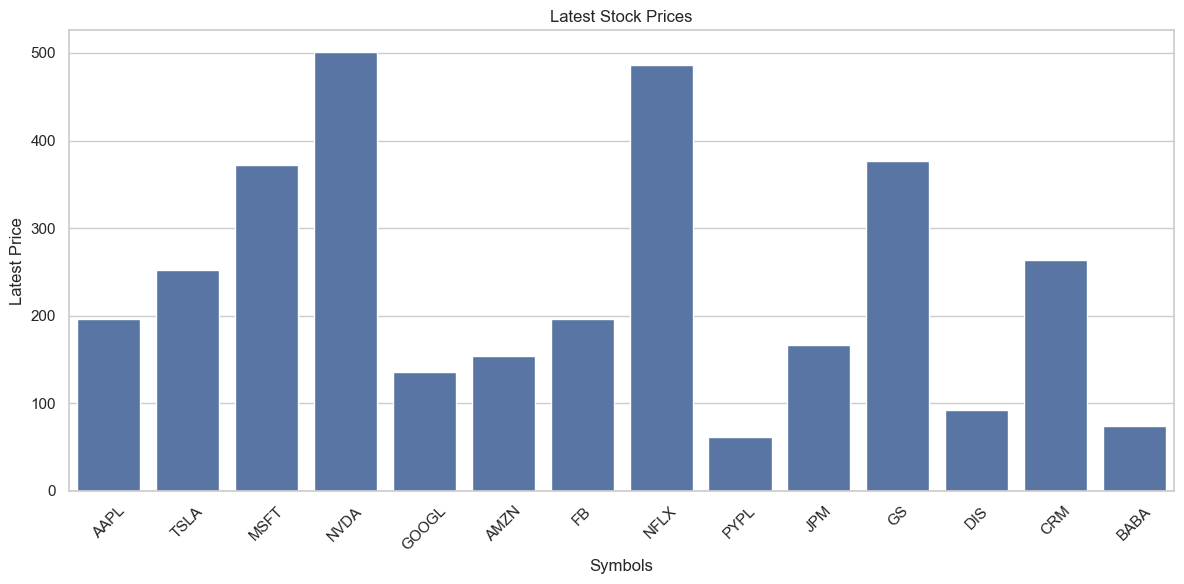

In [9]:
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

# MySQL connection details
config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Duke#7539',
    'database': 'stocks'
}

# Connect to MySQL
try:
    connection = mysql.connector.connect(**config)
    if connection.is_connected():
        cursor = connection.cursor()

        # Fetching data from the stock_data table
        select_query = "SELECT symbol, latest_price FROM stock_data"
        cursor.execute(select_query)
        data = cursor.fetchall()

        # Closing the database connection
        cursor.close()
        connection.close()

        if data:
            # Extracting symbols and latest prices
            symbols = [row[0] for row in data]
            prices = [row[1] for row in data]

            # Creating a bar plot using seaborn
            plt.figure(figsize=(12, 6))
            sns.set(style="whitegrid")
            plt.title("Latest Stock Prices")
            plt.xlabel("Symbols")
            plt.ylabel("Latest Price")
            sns.barplot(x=symbols, y=prices)
            plt.xticks(rotation=45)
            plt.tight_layout()

            # Show the plot
            plt.show()

        else:
            print("No data found in the stock_data table.")

    else:
        print("Connection failed!")

except mysql.connector.Error as error:
    print("Error while connecting to MySQL", error)


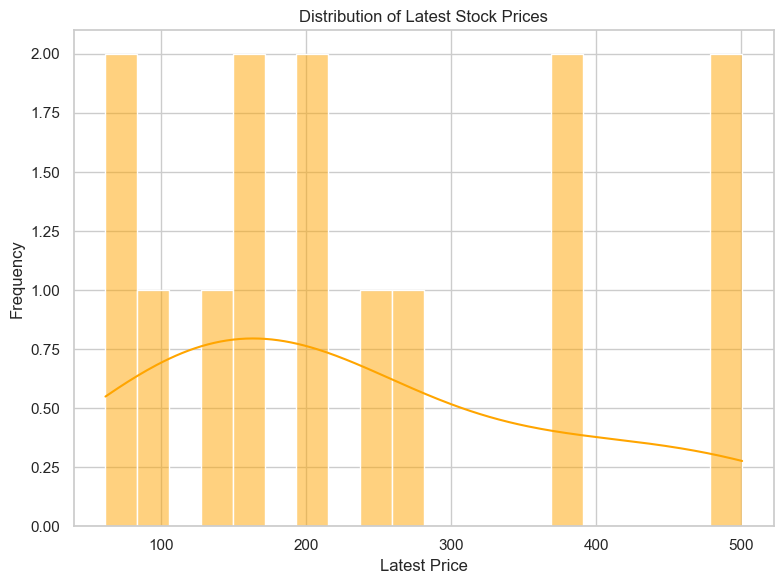

In [11]:
import mysql.connector
import seaborn as sns
import matplotlib.pyplot as plt

# MySQL connection details
config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Duke#7539',
    'database': 'stocks'
}

# Connect to MySQL
try:
    connection = mysql.connector.connect(**config)
    if connection.is_connected():
        cursor = connection.cursor()

        # Fetching data from the stock_data table
        select_query = "SELECT latest_price FROM stock_data"
        cursor.execute(select_query)
        data = cursor.fetchall()

        # Closing the database connection
        cursor.close()
        connection.close()

        if data:
            # Extracting latest prices
            prices = [row[0] for row in data]

            # Creating a distribution plot with a different color using seaborn
            plt.figure(figsize=(8, 6))
            sns.set(style="whitegrid")
            sns.histplot(prices, kde=True, bins=20, color='orange')  # Changing color to orange
            plt.title("Distribution of Latest Stock Prices")
            plt.xlabel("Latest Price")
            plt.ylabel("Frequency")
            plt.tight_layout()

            # Show the plot
            plt.show()

        else:
            print("No data found in the stock_data table.")

    else:
        print("Connection failed!")

except mysql.connector.Error as error:
    print("Error while connecting to MySQL", error)
